<a href="https://colab.research.google.com/github/CatalinaOrtegha/2ndChallenge_TelecomX/blob/main/TelecomX_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📊 Carga y análisis

In [62]:
import pandas as pd

In [63]:
import matplotlib.pyplot as plt

In [64]:
plt.style.use('fivethirtyeight')

In [65]:
dataset='https://raw.githubusercontent.com/CatalinaOrtegha/2ndChallenge_TelecomX/refs/heads/main/df_clean_telecomX.json'

In [66]:
df_clean=pd.read_json(dataset)
df_clean

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,account_contract,account_paymentmethod,account_charges_monthly,account_charges_total,daily_accounts
0,False,Female,False,True,True,12,One year,Mailed check,65.60,593.30,2.19
1,False,Male,False,False,False,1,Month-to-month,Mailed check,59.90,542.40,2.00
2,True,Male,False,False,False,1,Month-to-month,Electronic check,73.90,280.85,2.46
3,True,Male,True,True,False,1,Month-to-month,Electronic check,98.00,1237.85,3.27
4,True,Female,True,True,False,1,Month-to-month,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...
7262,False,Female,False,False,False,12,One year,Mailed check,55.15,742.90,1.84
7263,True,Male,False,True,False,1,Month-to-month,Electronic check,85.10,1873.70,2.84
7264,False,Male,False,False,False,1,Month-to-month,Mailed check,50.30,92.75,1.68
7265,False,Male,False,True,True,24,Two year,Mailed check,67.85,4627.65,2.26


In [67]:
df_clean.describe()

,customer_tenure,account_charges_monthly,account_charges_total,daily_accounts
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,8.835865,64.761692,2281.253259,2.158675
std,9.551444,30.090047,2265.703526,1.003088
min,1.000000,18.250000,18.800000,0.610000
25%,1.000000,35.500000,401.900000,1.180000
50%,1.000000,70.350000,1396.250000,2.340000
75%,12.000000,89.850000,3786.600000,2.990000
max,24.000000,118.750000,8684.800000,3.960000


##Distribución de evasión

In [68]:
churn=df_clean['churn'].value_counts()
churn

,count
churn,
False,5174
True,1869


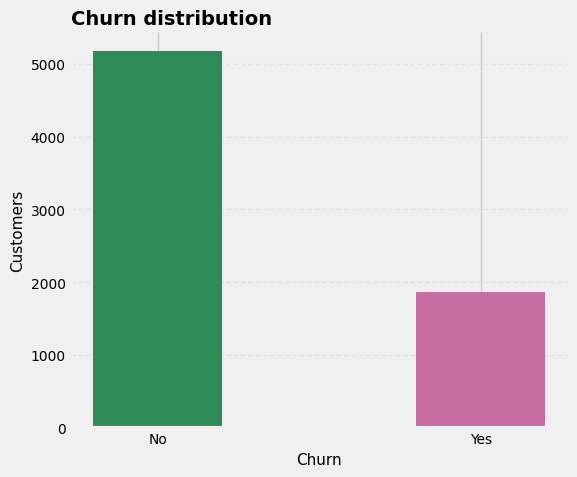

In [69]:
colors=['#2E8B57', '#C76DA2']

fig, ax = plt.subplots(figsize=(6,5))

ax.bar(churn.index, churn.values, color=colors, width=0.4)
ax.set_title('Churn distribution', loc='left', fontsize=14, fontweight='bold')
ax.set_xlabel('Churn', fontsize=11)
ax.set_ylabel('Customers',fontsize=11)
ax.set_xticks(range(len(churn.index)))
ax.set_xticklabels(['No', 'Yes'],fontsize=10)

# Estilo de ejes
ax.tick_params(axis='y', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Línea base sutil
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

##Recuento de evasión por variables categóricas

In [70]:
def churn_por_categoria(df, category, target='churn', title=None, xlabel=None):
    count = (
        df
        .groupby([category, target])
        .size()
        .unstack()
        .fillna(0)
    )

    count.plot(
        kind='bar',
        figsize=(7, 5),
        width=0.75
    )

    plt.title(
        title if title else f'Customer churn by {category}',
        loc='left',
        fontsize=14,
        fontweight='bold'
    )
    plt.xlabel(xlabel if xlabel else category)
    plt.ylabel('Customers')

    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    return count

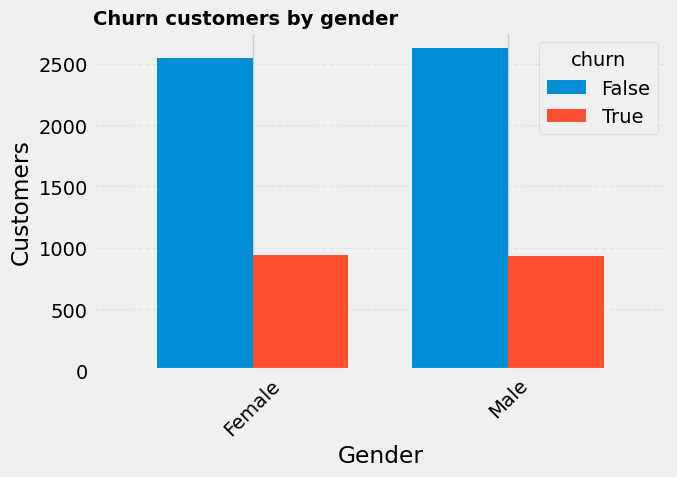

churn,False,True
customer_gender,,
Female,2549,939
Male,2625,930


In [71]:
count_gender = churn_por_categoria(df_clean, 'customer_gender', title='Churn customers by gender', xlabel='Gender')
count_gender

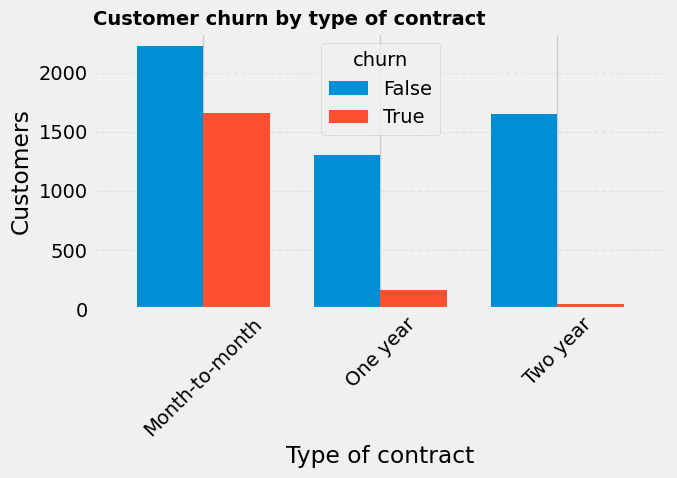

churn,False,True
account_contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [72]:
count_contract = churn_por_categoria(df_clean, 'account_contract', title='Customer churn by type of contract',xlabel='Type of contract')
count_contract

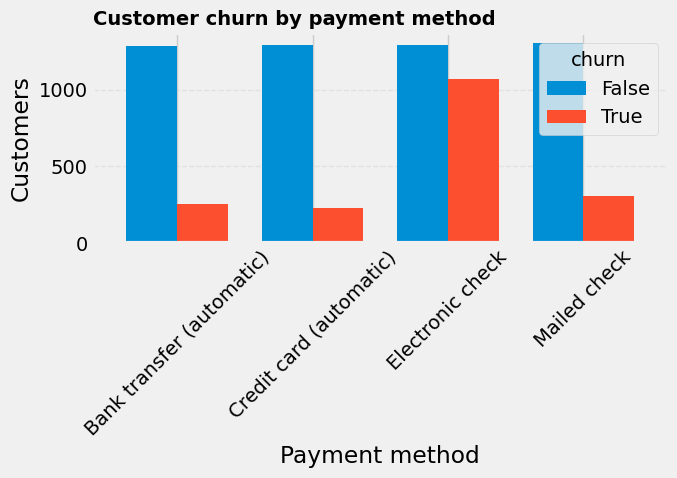

churn,False,True
account_paymentmethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [73]:
count_payment = churn_por_categoria(df_clean, 'account_paymentmethod', title='Customer churn by payment method', xlabel='Payment method')
count_payment

##Conteo de evasión por variables numéricas

In [74]:
def boxplot_por_churn(df, variable, target='churn',scale=5000, title=None,ylabel=None):

    # Normalizar churn a valores consistentes
    churn_map = {
        'No': 'No',
        'Yes': 'Yes',
        0: 'No',
        1: 'Yes',
        False: 'No',
        True: 'Yes'
    }

    temp = df.copy()
    temp[target] = temp[target].map(churn_map)

    data = [
        temp[temp[target] == 'No'][variable].dropna(),
        temp[temp[target] == 'Yes'][variable].dropna()
    ]

    fig, ax = plt.subplots(figsize=(7, 4))

    ax.boxplot(
        data,
        tick_labels=['No Churn', 'Churn'],
        patch_artist=True,
        widths=[0.5,0.5]
    )

    ax.set_title(
        f'Distribución de {variable} según evasión',
        loc='left',
        fontsize=14,
        fontweight='bold'
    )

    ax.set_ylim(0, scale)
    ax.set_ylabel(ylabel if ylabel else {variable})
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.set_axisbelow(True)

    plt.tight_layout()
    plt.show()


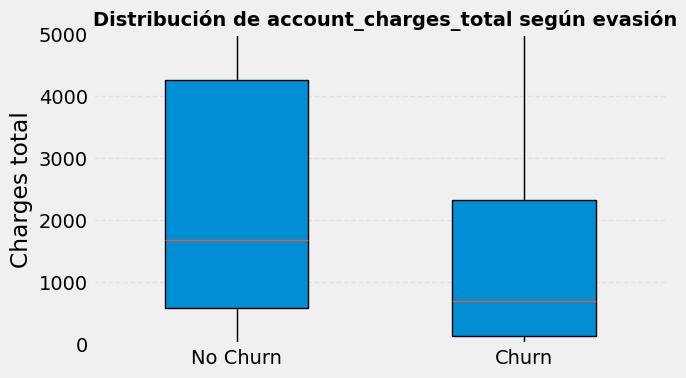

In [75]:
boxplot_por_churn(df_clean,'account_charges_total',title='Customer churn by charges total',ylabel='Charges total')

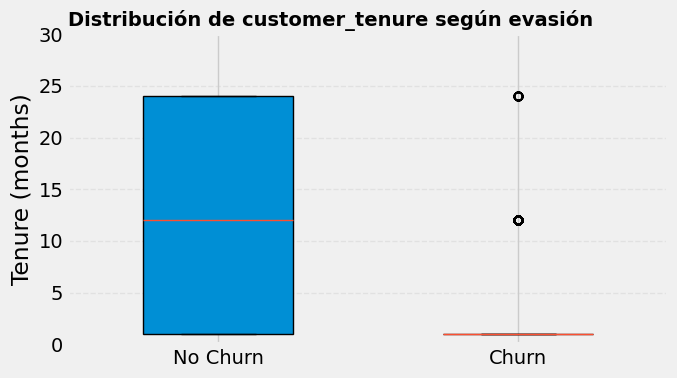

In [76]:
boxplot_por_churn(df_clean, 'customer_tenure',scale=30, title='Customer churn by tenure', ylabel='Tenure (months)')